In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators

In [2]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

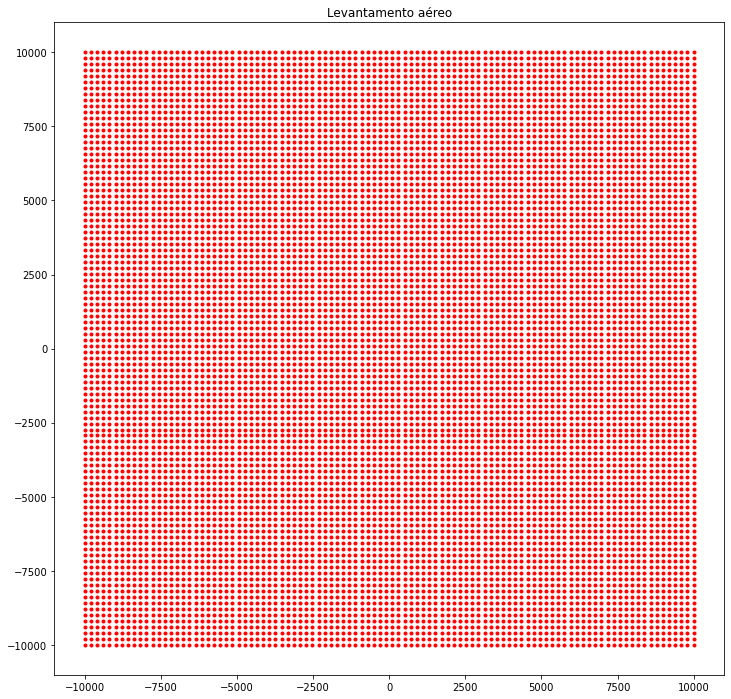

In [3]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

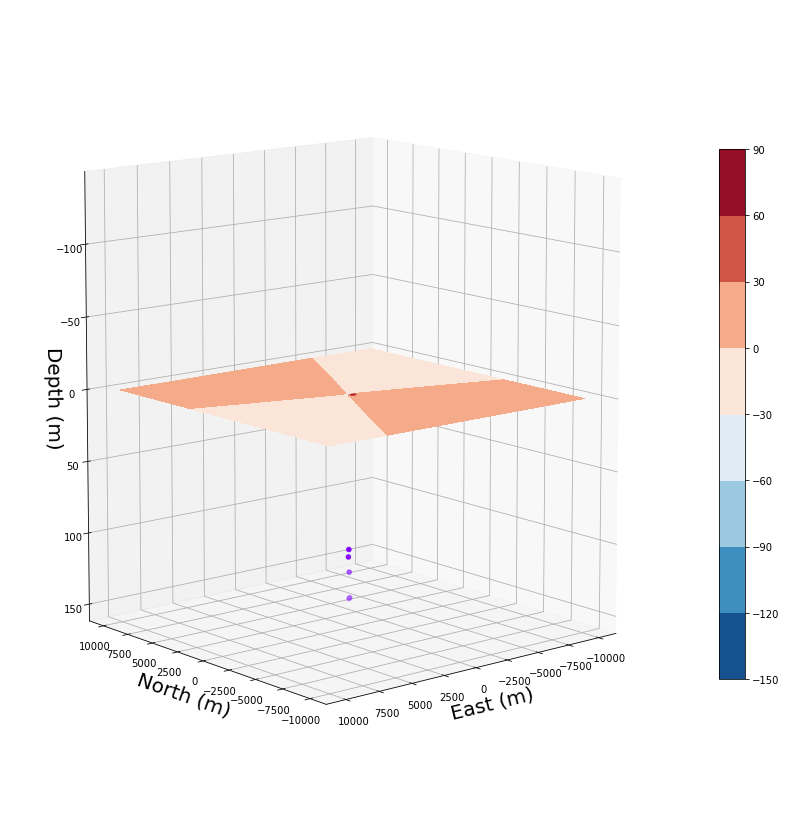

In [4]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

In [5]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 5,
                'n_pop': 10,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [6]:
I, D = 30.0, 50.0

filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [8]:
populacao = Operators.create_population(**population)
print("População Inicial: {}".format(populacao))
print("\n")
print(populacao[0][0][5])

val_fit = []

for i in range(100):
    fit_ = Operators.fit_value(X, Y, Z, I, D, populacao, tfa_n_bolinhas)
    pais_ = Operators.tournament_selection(populacao, fit_)
    filho_ = Operators.crossover(pais_)
    filho_ = Operators.mutacao(filho_, **filhos_mut)
    populacao = Operators.elitismo(populacao, filho_, fit_)
    #fit_cont = Operators.fit_value(X, Y, Z, I, D, populacao, tfa_n_bolinhas)
    #min_fit = min(fit_cont)
    #val_fit.append(min_fit)

last_fit = Operators.fit_value(X, Y, Z, populacao, tfa_n_bolinhas)

População Inicial: [array([[ 4.20983e+03,  4.28985e+03,  1.05240e+02, -1.97600e+01,
         4.82900e+01,  4.62000e+00],
       [-6.54694e+03, -8.56037e+03,  1.23510e+02, -1.97600e+01,
         4.82900e+01,  4.62000e+00],
       [ 5.49425e+03, -6.49992e+03,  1.18340e+02, -1.97600e+01,
         4.82900e+01,  4.62000e+00],
       [-4.54371e+03, -1.99344e+03,  5.50100e+01, -1.97600e+01,
         4.82900e+01,  4.62000e+00],
       [ 3.45905e+03, -3.13688e+03,  2.06700e+01, -1.97600e+01,
         4.82900e+01,  4.62000e+00]]), array([[ 5.97449e+03,  6.28619e+03,  1.21200e+01, -1.46000e+01,
         7.71000e+00,  1.18000e+00],
       [-1.60468e+03, -9.29320e+02,  1.36190e+02, -1.46000e+01,
         7.71000e+00,  1.18000e+00],
       [ 6.32695e+03,  6.46489e+03,  1.20750e+02, -1.46000e+01,
         7.71000e+00,  1.18000e+00],
       [-3.82495e+03, -6.15096e+03,  8.38700e+01, -1.46000e+01,
         7.71000e+00,  1.18000e+00],
       [ 3.25804e+03,  2.66818e+03,  1.38400e+02, -1.46000e+01,
     

IndexError: index 5 is out of bounds for axis 0 with size 5